In [10]:
pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
url = 'https://disease.sh/v3/covid-19/all'
response = requests.get(url)
data = response.json()

# Assign to a variable similar to 'global_data'
global_data = {
    'TotalConfirmed': data['cases'],
    'TotalDeaths': data['deaths'],
    'TotalRecovered': data['recovered'],
    'ActiveCases': data['active']
}

# Display the global data
print("Global COVID-19 Summary:")
print(f"Total Confirmed: {global_data['TotalConfirmed']}")
print(f"Total Deaths: {global_data['TotalDeaths']}")
print(f"Total Recovered: {global_data['TotalRecovered']}")
print(f"Active Cases: {global_data['ActiveCases']}")

Global COVID-19 Summary:
Total Confirmed: 704753890
Total Deaths: 7010681
Total Recovered: 675619811
Active Cases: 22123398


In [20]:
# Get COVID-19 data by country
url = 'https://disease.sh/v3/covid-19/countries'
response = requests.get(url)
countries_data = response.json()

# Create DataFrame
df = pd.DataFrame(countries_data)

# Select relevant columns
df = df[['country', 'cases', 'deaths', 'recovered', 'active', 'population']]

# Show top 10 countries by total cases
top_10 = df.sort_values('cases', ascending=False).head(10)
print(top_10)

      country      cases   deaths  recovered    active  population
218       USA  111820082  1219487  109814428    786167   334805269
94      India   45035393   533570          0  44501823  1406631776
71     France   40138560   167642   39970918         0    65584518
77    Germany   38828995   183027   38240600    405368    83883596
26     Brazil   38743918   711380   36249161   1783377   215353593
171  S. Korea   34571873    35934   34535939         0    51329899
103     Japan   33803572    74694          0  33728878   125584838
101     Italy   26723249   196487   26361218    165544    60262770
217        UK   24910387   232112   24678275         0    68497907
168    Russia   24124215   402756   23545818    175641   145805947


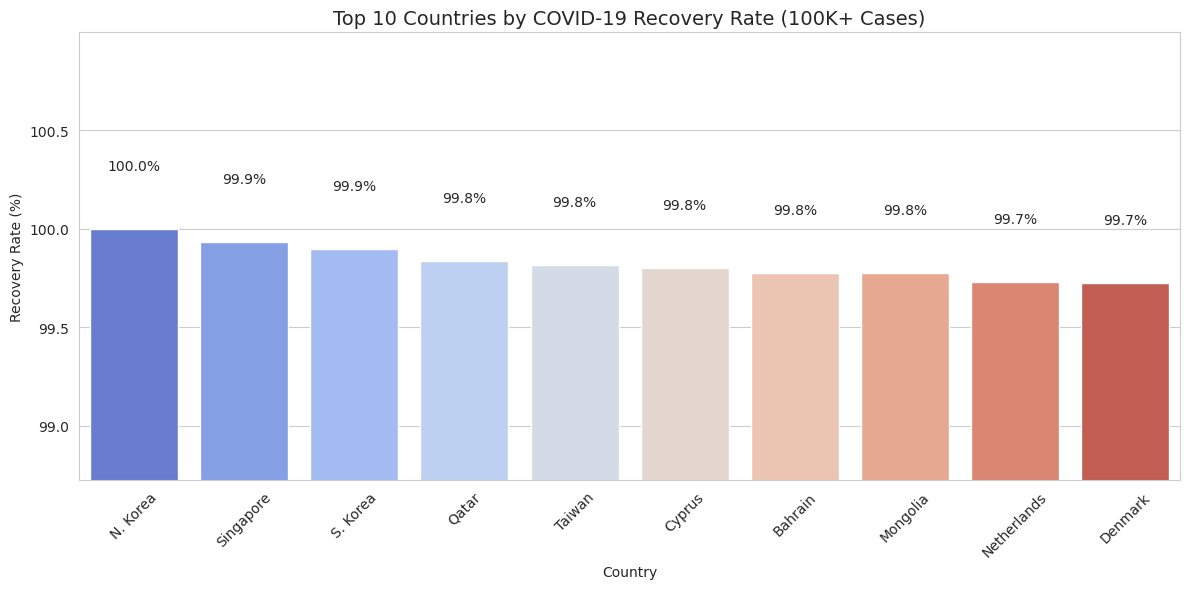

In [22]:
# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=top_recovery,
    x='country',
    y='recovery_rate',
    palette='coolwarm'
)

# Add value labels
for index, row in top_recovery.iterrows():
    barplot.text(
        x=top_recovery.index.get_loc(index),
        y=row['recovery_rate'] + 0.3,
        s=f"{row['recovery_rate']:.1f}%",
        ha='center'
    )

# Zoom into recovery rate range to highlight small differences
min_rate = top_recovery['recovery_rate'].min()
max_rate = top_recovery['recovery_rate'].max()
plt.ylim(min_rate - 1, max_rate + 1)

plt.title('Top 10 Countries by COVID-19 Recovery Rate (100K+ Cases)', fontsize=14)
plt.ylabel('Recovery Rate (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


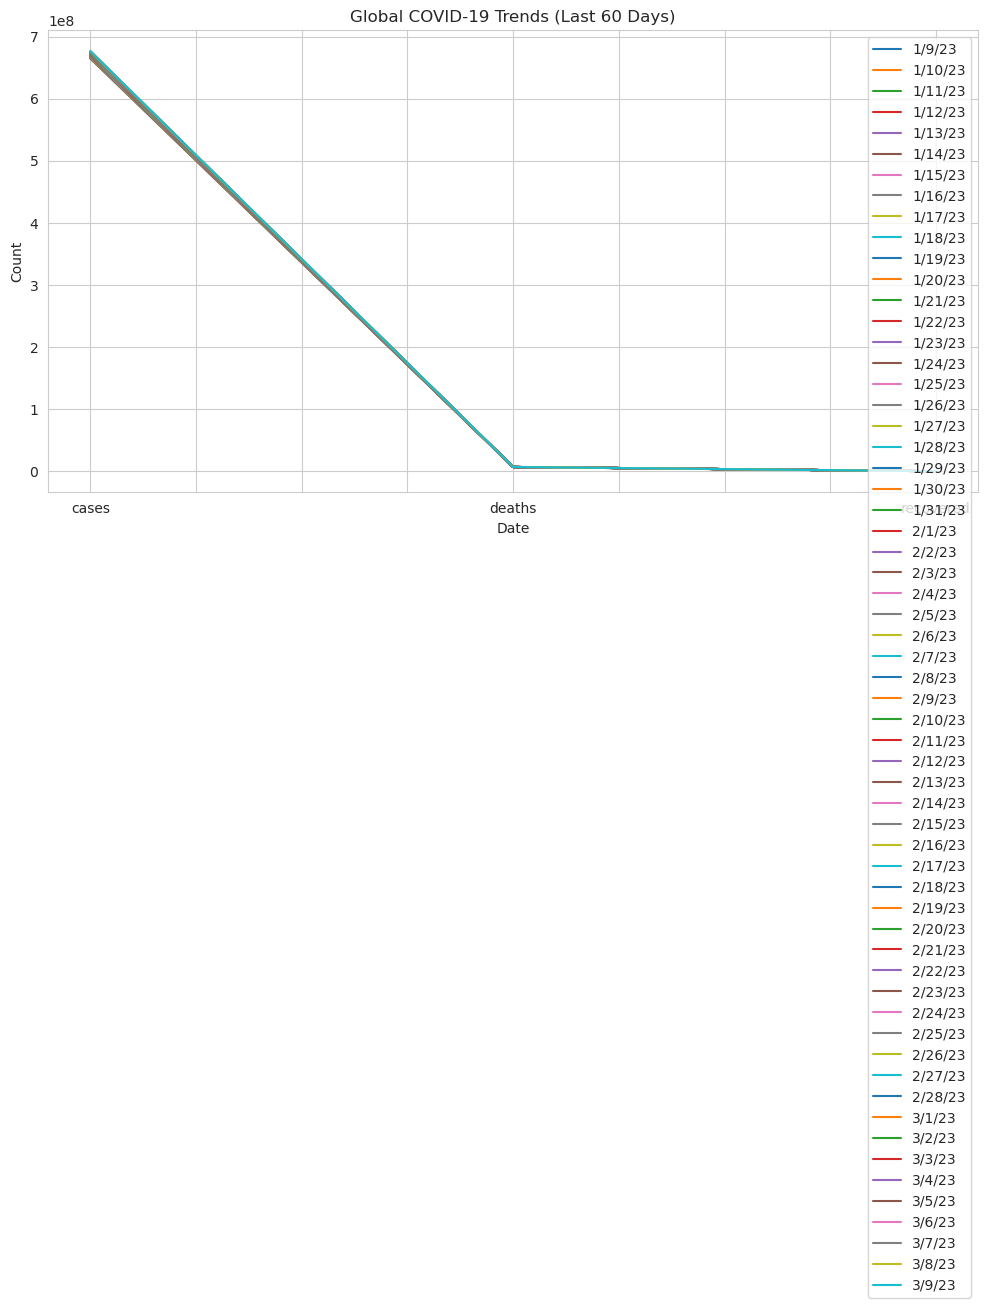

In [24]:
# Example: Fetch time-series data for global
url = 'https://disease.sh/v3/covid-19/historical/all?lastdays=60'
response = requests.get(url)
time_data = response.json()

# Create a DataFrame
df_time = pd.DataFrame(time_data)
df_time = df_time.transpose()

# Plot
df_time.plot(figsize=(12,6), title='Global COVID-19 Trends (Last 60 Days)')
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [27]:
# Growth rate = new cases / total cases
df['cases_per_million'] = (df['cases'] / df['population']) * 1e6
df['growth_rate'] = (df['active'] / df['cases']) * 100

# Top 10 by growth rate
top_growth = df[df['cases'] > 100000].sort_values('growth_rate', ascending=False).head(10)
